<a href="https://colab.research.google.com/github/Thatohatsi880/Pytorch-Practice-tutorials/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
#create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) -->
  # Hidden Layer1(number of neurons)-->
  #H2(n) -->
  # output( 3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [32]:
#Pick a manual for radomization
torch.manual_seed(29)
#Create an instance of model
model = Model()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [35]:
#Changed  last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
#Train Test split! Set X, y
X = my_df.drop('variety', axis= 1)
y = my_df['variety']

In [37]:
#Convert these to numpy arrays
X = X.values
y = y.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [52]:
#Convert the x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [54]:
#Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:
# Set the criterion of the model to measure the error, how far off the prediction are from data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learnin rate(iferror does not go down after a bunch of iterations(epochs))
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [56]:
#Train our model!
#Epoch? (one run thru all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  #Go forward and get a prediction
  y_pred = model.forward(X_train)  #Get predicted results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
     print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagtion: take the error rate of forward propagation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.06375186890363693
Epoch: 10 and loss: 0.10678057372570038
Epoch: 20 and loss: 0.06302747875452042
Epoch: 30 and loss: 0.06604789197444916
Epoch: 40 and loss: 0.06437180936336517
Epoch: 50 and loss: 0.0625842958688736
Epoch: 60 and loss: 0.0620003379881382
Epoch: 70 and loss: 0.06172579899430275
Epoch: 80 and loss: 0.06150262802839279
Epoch: 90 and loss: 0.061284374445676804


Text(0.5, 0, 'epoch')

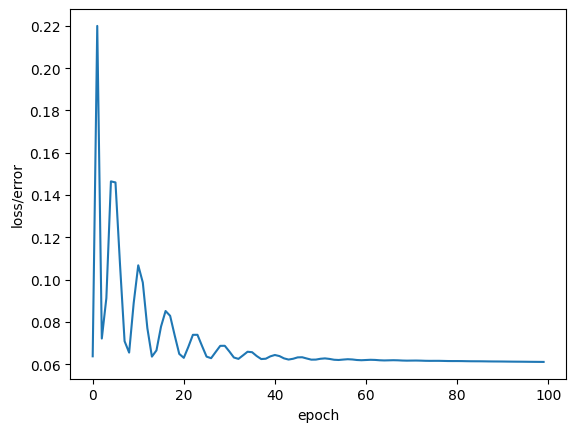

In [57]:
#Graph it out!
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")


In [58]:
#Evaluate Model on Test Data Set(validate model on test set)
with torch.no_grad(): #Basically turn off back propagation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) #Find the loss or error


In [59]:
loss

tensor(0.0128)

In [60]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = 'Virginica'

    #Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() ==y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) tensor([  9.3817,  -1.1376, -14.3997]) 	 0
2.) tensor([  9.3510,  -0.8379, -14.4216]) 	 0
3.) tensor([-11.2072,   6.6132,  14.1045]) 	 2
4.) tensor([-1.9977,  8.1089,  0.3648]) 	 1
5.) tensor([  8.9324,  -1.0673, -13.7264]) 	 0
6.) tensor([  9.3302,  -0.6605, -14.4399]) 	 0
7.) tensor([-12.2125,   6.4877,  15.5928]) 	 2
8.) tensor([  9.0671,  -0.7522, -14.0152]) 	 0
9.) tensor([-12.8882,   6.8535,  16.4766]) 	 2
10.) tensor([-10.3609,   9.4295,  12.1008]) 	 2
11.) tensor([-4.5983,  8.2144,  4.0595]) 	 1
12.) tensor([ 10.0638,  -1.1248, -15.4444]) 	 0
13.) tensor([-9.6820,  8.0038, 11.4984]) 	 2
14.) tensor([-0.8459,  6.8450, -0.9370]) 	 1
15.) tensor([-3.4378,  9.3650,  2.0771]) 	 1
16.) tensor([-3.4452,  8.6017,  2.2863]) 	 1
17.) tensor([-10.2365,   8.4324,  12.1906]) 	 2
18.) tensor([-11.7454,   8.0686,  14.4762]) 	 2
19.) tensor([-12.3984,   6.7782,  15.7827]) 	 2
20.) tensor([  9.5516,  -0.9857, -14.6902]) 	 0
21.) tensor([-8.3156,  7.9572,  9.5292]) 	 2
22.) tensor([ 10.5763,

In [93]:
new_iris = torch.tensor([4.7, 3.2, 0.2, 1,3])

In [104]:
def forward(new_iris):
    print(F.linear(new_iris))
new_iris

tensor([4.7000, 3.2000, 0.2000, 1.0000, 3.0000])

In [105]:
newer_iris = torch.tensor([5.1, 5.3, 5.5, 6.9])

In [111]:
def foward(newer_iris):
  return F.linear(newer_iris)
newer_iris

tensor([5.1000, 5.3000, 5.5000, 6.9000])

In [113]:
#Save our NN Model

torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [114]:
#Load the saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [115]:
#Make sure it loaded properly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)